In [1]:
2+2

4

In [2]:
import importlib
from mkids import TopSoc
import numpy as np
import matplotlib.pyplot as plt
import Scan
from tqdm.notebook import trange
soc = TopSoc()

In [40]:
importlib.reload(Scan)
scan = Scan.Scan(soc)

In [74]:
#fMixer = soc.fsOut/2
fMixer=4500
soc.set_mixer(fMixer)

4500.0

In [75]:
# One frequency per output bin, offset a little bit from the middle
outChs = np.arange(soc.nOutCh)
freqs = np.sort(soc.outCh2FreqCenter(outChs))
inChs, inOffsets = soc.inFreq2chOffset(freqs)
#for i in range(soc.nOutCh):
#    print("freq=%8.3f  outCh=%3d  inCh=%4d   inOffset=%+5.3f"%(freqs[i],outChs[i], inChs[i], inOffsets[i]))
    #print(i, outChs[i], freqs[i])

In [76]:
nFreqs = len(freqs)
amps = np.array([0.9])
fis = np.array([0])
allxs = np.zeros(nFreqs, dtype=complex)
for i in trange(nFreqs):
    fTone = freqs[i]
    scan.setTones(np.array([fTone]), amps, fis)
    scan.prepRead(decimation=2)
    xs = scan.readAndUnpack(nsamp=10000, iBegin=1000, average=True)
    allxs[i] = xs[0]

  0%|          | 0/512 [00:00<?, ?it/s]

3885.6 5112.0


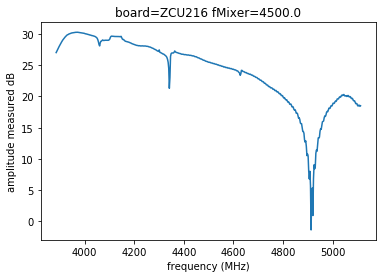

In [77]:
plt.plot(freqs, 10*np.log10(np.abs(allxs)))
#plt.plot(freqs, np.abs(allxs))
plt.xlabel("frequency (MHz)")
plt.ylabel("amplitude measured dB")
plt.title("board=%s fMixer=%.1f"%(soc.board, soc.get_mixer()))
plt.savefig("temp.png")
print(freqs.min(),freqs.max())

In [78]:
soc.dacs

{'20': {'fs': 4915.2, 'f_fabric': 307.2}}

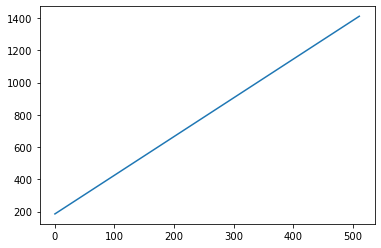

In [9]:
plt.plot(freqs)

In [37]:
deltaF = 180
freqs = np.array([soc.fsIn/2 + deltaF])
#inChs, inOffsets = soc.inFreq2chOffset(freqs)
#print("freqs =",freqs)
#print(inChs, inOffsets)

In [38]:
print(freqs)
print(amps)
print(fis)
scan.setTones(freqs, amps, fis)
scan.prepRead(decimation=2)
xs = scan.readAndUnpack(nsamp=10000, iBegin=1000, average=False)
print(scan.inChs, scan.inOffsets)

[1408.8]
[0.9]
[0]
[362] [-9.75886039e-14]


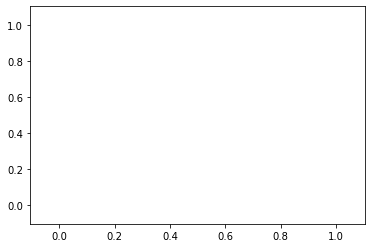

In [39]:
plt.plot(np.real(xs[0][0]))
plt.plot(np.imag(xs[0][0]))
